# MiCRM Parameters Exploration and Model Simulations

## Installing, loading and activating environment!!!

In [5]:
using Pkg
using MiCRM
using DifferentialEquations
using Distributions
using Plots
using CairoMakie
using Colors

[ Info: Precompiling CairoMakie [13f3f980-e62b-5c42-98c6-ff1f3baf88f0]


In [7]:
Pkg.activate(".")

  Activating project at `~/Desktop/CMEEResearchProject/Tutorials/MiCRM`


### First, I define initial parameters for the community

In [44]:
N = 3 # Consumers
M = 6 # Resources
leakage = 0.2

0.2

### I also define the consumers loss term (m) as the maintenance cost to process the resources consumed

In [45]:
maintain(N,M,kw) = repeat([0.2], N)

maintain (generic function with 1 method)

In [46]:
# Generate modular uptake
# modul_uptk(N,M,kw) = MiCRM.Parameters.modular_uptake(N,M, 
#                                                        N_modules = N,
#                                                        s_ratio = 2.0)

In [47]:
# Generate the extra parameters from the package function
params = MiCRM.Parameters.generate_params(N,M, f_m = maintain, λ = leakage)

(N = 3, M = 6, u = [0.5319677630927722 0.09555418750808785 … 0.01147361386264226 0.009027262865549796; 0.01031289987633512 0.15970632629992204 … 0.02792371790815831 0.3181319327393174; 0.05106233025494606 0.04643017314496234 … 0.005202392679821175 0.4165754082472899], m = [0.2, 0.2, 0.2], ρ = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], ω = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], l = [0.012443020517814868 0.10123376396448867 … 0.008757759656057707 0.009088532239356115; 0.0092646882118089 0.05989377284487673 … 0.024734671052341232 0.02996906790213752; … ; 0.02066134762565463 0.054242777962393844 … 0.016657681209266934 0.024652694422695173; 0.043554595349181054 0.018841952022775388 … 0.05733982922394886 0.013872945325595541], kw = (λ = 0.2,))

### Setting initial conditions for the problem

In [48]:
x0 = ones(N+M)
tspan = (0.0, 100.0)

prob = ODEProblem(MiCRM.Simulations.dx!, x0, tspan, params)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 100.0)
u0: 9-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [49]:
sol = solve(prob, AutoTsit5(Rosenbrock23()))

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 41-element Vector{Float64}:
   0.0
   0.11416205964360641
   0.3485735588347405
   0.6341552437675635
   0.979947028685732
   1.3764731517080697
   1.827920571248769
   2.3335052081758065
   2.8992575366948437
   3.527559013777809
   4.2182885381835415
   4.962386368536015
   5.748824497616242
   ⋮
  19.798935907148106
  22.290123351823837
  24.844969439286345
  28.5195582426874
  32.55694173671537
  38.16171117616606
  44.83852937334756
  54.09286706479022
  65.54508990640883
  79.81566923910674
  95.72212822365444
 100.0
u: 41-element Vector{Vector{Float64}}:
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
 [1.0684541927951823, 1.0680229820625775, 1.0677812570495526, 0.9481005757202356, 0.9775177408533756, 0.9264953497903751, 0.9488932874008921, 1.0034482269253648, 0.9355551539307022]
 [1.208284137063468, 1.2043455817636624, 1.2020115588609253, 0.85

In [50]:
# Final state of community
sol[end]

9-element Vector{Float64}:
  7.50773125586686
 10.928352528630604
  1.3127682081074243
  0.22709621237936234
  0.33745177506502555
  0.1892345026310701
  0.25023778786150447
  0.8055257074764979
  0.23858192957210775

#### **Plotting the solution**

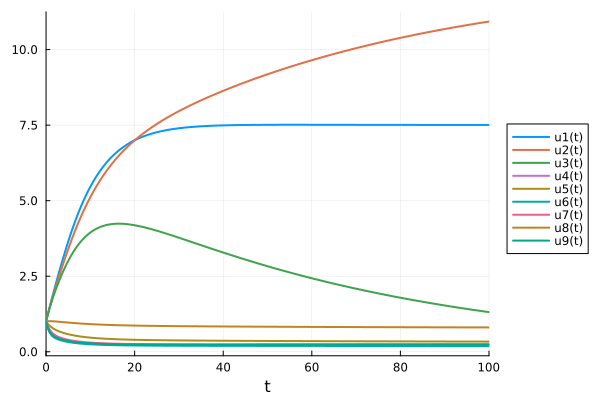

In [51]:
Plots.plot(sol, linewidth = 2, legend = :outerright)

## **Simulations**

In [52]:
# Define varying counts for specific parameters
N_leak = 10
N_mod = 3
N_special = 3
N_rep = 5

# Define ranges of parameters
leak_vect = range(0.0, 0.5, length = N_leak)
modular_vect = range(1.0, 3.0, length = N_mod)
specialist_vect = range(1.0, 5.0, length = N_special)

1.0:2.0:5.0

In [53]:
# Creating array to store results
results = Array{Any, 4}(undef, N_leak, N_mod, N_special, N_rep)

# Generating simulations
for i = 1:N_leak
    for j = 1:N_mod
        for k = 1:N_special
            for r = 1:N_rep
                
                # Generate parameters
                params = MiCRM.Parameters.generate_params(N,M, f_m = maintain, λ = leak_vect[i])
                
                #...Need to define the modular uptake
                
                # Start simulation
                x0 = ones(N+M)
                tspan = (0.0, 500.0)

                prob = ODEProblem(MiCRM.Simulations.dx!, x0, tspan, params)

                results[i, j, k, r] = solve(prob, AutoTsit5(Rosenbrock23()))
                
            end
        end
    end
end

In [54]:
size(results)

(10, 3, 3, 5)

In [55]:
results[1,1,1,1].prob.p.kw

(λ = 0.0,)

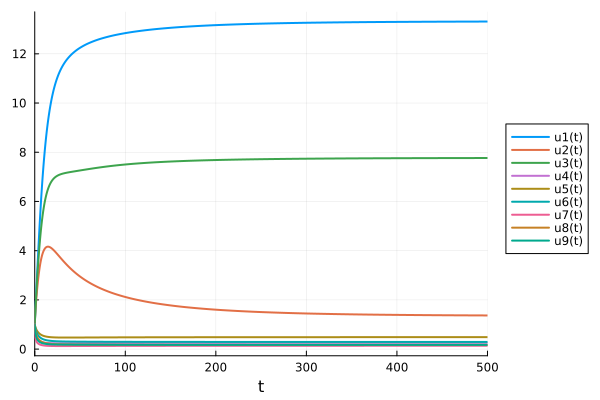

In [56]:
Plots.plot(results[1], linewidth = 2, legend = :outerright)

In [57]:
results[5].prob.p.u

3×6 Matrix{Float64}:
 0.112853   0.295502   0.0820899  0.0129427  0.424999  0.0716134
 0.119242   0.0377024  0.395622   0.144033   0.205428  0.0979722
 0.0804842  0.0588904  0.249223   0.409693   0.128511  0.0731991

In [58]:
results[5][:,:]

9×47 Matrix{Float64}:
 1.0  1.06644   1.19958   1.35797   1.54621   …  8.39282   8.40701   8.41027
 1.0  1.0663    1.1982    1.35334   1.53506      4.13486   4.07853   4.06562
 1.0  1.06651   1.20008   1.3593    1.54847      8.63346   8.67477   8.68423
 1.0  0.976614  0.933421  0.887674  0.840318     0.387613  0.387819  0.387866
 1.0  0.966589  0.906733  0.84611   0.786454     0.289784  0.289475  0.289404
 1.0  0.932123  0.817896  0.713319  0.622797  …  0.211108  0.211527  0.211623
 1.0  0.955312  0.876515  0.798851  0.725249     0.244624  0.2442    0.244103
 1.0  0.926866  0.805259  0.695924  0.603209     0.175033  0.175039  0.17504
 1.0  0.986735  0.96039   0.929719  0.894879     0.459621  0.459883  0.459943

In [59]:
results[4,1,1,1].prob.p.kw

(λ = 0.16666666666666666,)

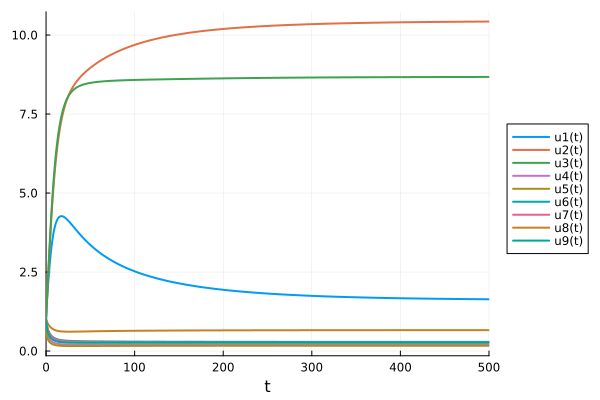

In [60]:
Plots.plot(results[4,1,1,1], linewidth = 2, legend = :outerright)

In [61]:
results[6,1,1,1].prob.p.kw

(λ = 0.2777777777777778,)

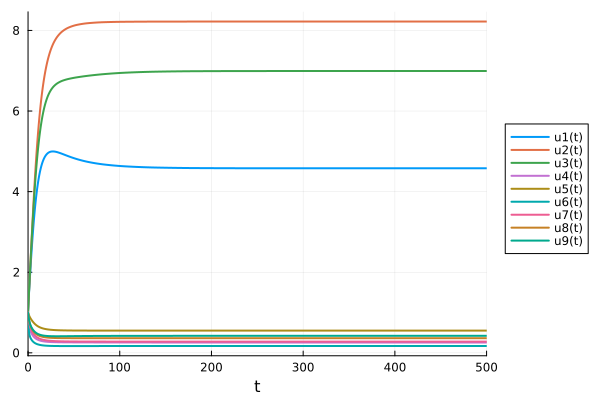

In [62]:
Plots.plot(results[6], linewidth = 2, legend = :outerright)

In [63]:
results[9,1,1,1].prob.p.kw

(λ = 0.4444444444444444,)

In [64]:
results[9].prob.p.u

3×6 Matrix{Float64}:
 0.28471   0.243775  0.284934   0.112447  0.020799   0.0533348
 0.41403   0.14804   0.358691   0.028618  0.0198244  0.0307964
 0.219811  0.430049  0.0293405  0.147098  0.0788439  0.0948576

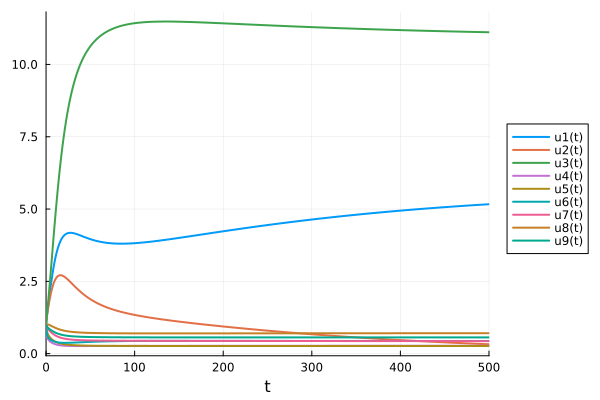

In [65]:
Plots.plot(results[9,1,1,1], linewidth = 2, legend = :outerright)

In [66]:
results[9][:,:]

9×48 Matrix{Float64}:
 1.0  1.04119   1.11478   1.19687   …   4.79159    4.99796    5.16678
 1.0  1.04082   1.11181   1.18811       0.569437   0.434603   0.324177
 1.0  1.04169   1.11872   1.20866      11.2384    11.1694    11.1129
 1.0  0.920724  0.803743  0.705833      0.27297    0.27363    0.274175
 1.0  0.965824  0.90773   0.84889       0.264924   0.26494    0.264954
 1.0  0.939039  0.84592   0.763936  …   0.43944    0.438171   0.437144
 1.0  0.992418  0.976968  0.957634      0.436119   0.434867   0.433848
 1.0  1.00549   1.01292   1.01789       0.7052     0.706703   0.707937
 1.0  0.991573  0.976783  0.960832      0.561427   0.561274   0.561149

## Transform to matrices

### Consumers

In [67]:
C = reduce(hcat, results[7,3,2,2].u)'[:, 1:N]

44×3 Matrix{Float64}:
 1.0      1.0       1.0
 1.05039  1.0504    1.05224
 1.13271  1.13283   1.14643
 1.21882  1.2193    1.25843
 1.31385  1.31518   1.39976
 1.41174  1.41461   1.56532
 1.51633  1.52167   1.76327
 1.62823  1.63709   1.99639
 1.75149  1.76514   2.27576
 1.8884   1.9083    2.61172
 2.04144  2.06935   3.01846
 2.20676  2.24455   3.49565
 2.37198  2.42093   4.01394
 ⋮                 
 3.50657  3.72789  10.7418
 3.49218  3.72008  10.944
 3.46973  3.70379  11.1203
 3.44666  3.68524  11.2364
 3.42422  3.66649  11.3165
 3.40838  3.65334  11.3589
 3.39939  3.64656  11.378
 3.39578  3.64506  11.3836
 3.3941   3.64612  11.3843
 3.39205  3.64844  11.3841
 3.38953  3.65122  11.3838
 3.38944  3.65132  11.3838

### Resources

In [68]:
R = reduce(hcat, results[7,3,2,2].u)'[:, N+1:N+M]

44×6 Matrix{Float64}:
 1.0       1.0       1.0       1.0       1.0       1.0
 0.945574  0.970507  0.900287  0.990792  0.979792  1.00341
 0.864146  0.92287   0.763387  0.97429   0.943665  1.00691
 0.789739  0.874543  0.653144  0.955083  0.902333  1.00795
 0.721353  0.824515  0.566343  0.931875  0.854202  1.00638
 0.665876  0.77833   0.507295  0.906503  0.804548  1.00252
 0.621221  0.736026  0.46718   0.878824  0.754348  0.99687
 0.585872  0.698324  0.439145  0.849552  0.705743  0.990057
 0.556367  0.663726  0.416905  0.81825   0.658314  0.982276
 0.530083  0.630845  0.397038  0.784601  0.611621  0.973524
 0.504964  0.598143  0.377827  0.747971  0.564809  0.963503
 0.480652  0.565638  0.359249  0.709153  0.518976  0.952141
 0.458301  0.535137  0.34233   0.671006  0.477204  0.940003
 ⋮                                                 ⋮
 0.327257  0.336865  0.25096   0.39325   0.236216  0.805639
 0.3267    0.334246  0.25114   0.388508  0.232698  0.802936
 0.326671  0.332204  0.251752  0.384

## Plotting C and R dynamics

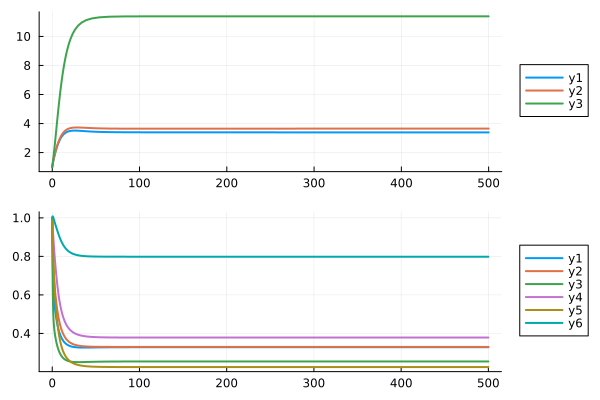

In [69]:
p1 = Plots.plot(results[7,3,2,2].t, C, linewidth = 2, legend = :outerright)
p2 = Plots.plot(results[7,3,2,2].t, R, linewidth = 2, legend = :outerright)

Plots.plot(p1, p2, layout = (2,1))

### Coalescence of 2 communities with different leakage values

In [70]:
# Consumers from "less leaky" community
l1 = copy(results[1,1,1,1].u[end])

consumers_l1 = l1[1:10]

LoadError: BoundsError: attempt to access 9-element Vector{Float64} at index [1:10]

In [71]:
# Consumers from the "high leak" community
l2 = copy(results[9,1,1,1].u[end])

consumers_l2 = l2[1:10]

LoadError: BoundsError: attempt to access 9-element Vector{Float64} at index [1:10]

In [72]:
# Combining two community vectors
coal_comm = reduce(vcat, (consumers_l1, consumers_l2))

20-element Vector{Float64}:
  1.3224941466909033
  3.967200645896864
  2.2651276223960095
  2.296797904667898
  5.525899750982456
  4.106719960116264
  0.07571298754511145
  6.923824333011125
  4.5030948897889145
  8.924007248034568
  2.6022723385436795
  1.1763498418929865
  0.32855133303497214
  0.0062279954711911565
  8.853812399104434
  5.408808974272997
  0.02301304780585097
  0.6937744492254253
  0.18736511550944715
 11.825361142459618

In [37]:
# Getting community-specific uptake rates
l1_uptake = copy(results[1,1,1,1].prob.p.u)

l2_uptake = copy(results[9,1,1,1].prob.p.u)

# Combining rates
coal_uptake = reduce(vcat, (l1_uptake, l2_uptake))

20×10 Matrix{Float64}:
 0.103492    0.130887   0.141134    …  0.0134774  0.0881875   0.233697
 0.0667612   0.0434662  0.0756091      0.135776   0.0806739   0.117496
 0.00811913  0.0140351  0.121752       0.116705   0.273192    0.279325
 0.124515    0.0317256  0.131128       0.0158889  0.0521519   0.211206
 0.156199    0.231982   0.323116       0.0664289  0.020967    0.0062669
 0.112293    0.0400413  0.0617696   …  0.0619559  0.136096    0.0564669
 0.0828573   0.0182894  0.200155       0.0239317  0.0316853   0.152038
 0.103685    0.129273   0.163311       0.0683256  0.147169    0.0730664
 0.00780159  0.0681616  0.069629       0.147224   0.00235318  0.285128
 0.0444044   0.07896    0.00586024     0.123725   0.102129    0.00884836
 0.0819781   0.205063   0.0414341   …  0.0515277  0.107308    0.0496224
 0.0319154   0.17972    0.318884       0.043355   0.0151091   0.176064
 0.0327308   0.0440841  0.0788825      0.0468179  0.0143094   0.195375
 0.0290239   0.0419957  0.123891       0.0430674

In [38]:
coaslesc_uptake(N,M,kw) = copy(coal_uptake)

coaslesc_uptake (generic function with 1 method)

In [39]:
# Defining maintenance to new community and remaining parameters
maintain(N,M,kw) = repeat([0.2], length(coal_comm))

inflow_rate(N,M,kw) = repeat([1.0], length(coal_comm))

outflow_rate(N,M,kw) = repeat([1.0], length(coal_comm))

outflow_rate (generic function with 1 method)

In [40]:
# Generating parameters
params = MiCRM.Parameters.generate_params(length(coal_comm), M, f_m = maintain, λ = leakage)

(N = 20, M = 10, u = [0.03825740798863658 0.08951916753339179 … 0.11911316236070822 0.19919162346770006; 0.09726747178980671 0.19039102483607687 … 0.050171480943009175 0.13104777306525667; … ; 0.2910517776128845 0.03644506022543054 … 0.06678061364542946 0.042255573550522056; 0.0022225936880098697 0.018780946239198324 … 0.09911775653210068 0.3820326527289141], m = [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2], ρ = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], ω = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], l = [0.0014819968802188927 0.04151254283602304 … 0.03236103902148881 0.016470629254753812; 0.00287335080599246 0.007425824356409035 … 0.048496127283485485 0.007352532628151104; … ; 0.0026542014353853 0.01575376762509697 … 0.0732786951324998 0.007542404647254305; 0.000304388711630747 0.029493322308864783 … 0.0034248413746984924 0.07584291444890177], kw = (λ = 0.2,))

In [41]:
x0 = coal_comm
tspan = (0.0, 500.0)

prob = ODEProblem(MiCRM.Simulations.dx!, x0, tspan, params)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 500.0)
u0: 20-element Vector{Float64}:
  1.3224941466909033
  3.967200645896864
  2.2651276223960095
  2.296797904667898
  5.525899750982456
  4.106719960116264
  0.07571298754511145
  6.923824333011125
  4.5030948897889145
  8.924007248034568
  2.6022723385436795
  1.1763498418929865
  0.32855133303497214
  0.0062279954711911565
  8.853812399104434
  5.408808974272997
  0.02301304780585097
  0.6937744492254253
  0.18736511550944715
 11.825361142459618

In [42]:
params.u

20×10 Matrix{Float64}:
 0.0382574   0.0895192   0.238173     …  0.0775044  0.119113     0.199192
 0.0972675   0.190391    0.215661        0.156322   0.0501715    0.131048
 0.0990653   0.294732    0.0236989       0.084927   0.0212672    0.115359
 0.0204491   0.105065    0.160137        0.117973   0.0961393    0.120009
 0.0067155   0.0229447   0.0875511       0.0979221  0.0512049    0.00675474
 0.110792    0.0298616   0.000863706  …  0.374242   0.0173321    0.121125
 0.208575    0.0303353   0.292978        0.130102   0.019904     0.0355696
 0.167681    0.0367714   0.0100079       0.164356   0.16582      0.108187
 0.0290047   0.283301    0.102633        0.0365613  0.128331     0.056748
 0.0599506   0.219375    0.00320747      0.0293004  0.258988     0.0687189
 0.181904    0.0535596   0.145493     …  0.180888   0.104378     0.016211
 0.0161457   0.14664     0.0829905       0.124605   0.202997     0.0128006
 0.101294    0.0629694   0.00625621      0.0629224  0.172027     0.0507017
 0.162003

In [43]:
sol = solve(prob, AutoTsit5(Rosenbrock23()))

LoadError: BoundsError: attempt to access 20-element Vector{Float64} at index [21]